In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

<pre>
Loading the Dataset and Data dictionary for analysis

In [576]:
#loading the dataset in a dataframe for analysis
loan = pd.read_csv('loan.csv')

In [577]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [578]:
#Loading Data dictionary
data_dict = pd.read_excel('Data_Dictionary.xlsx')

In [579]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


### Exploratory Data Analysis

<pre>
Analysing the data

In [580]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [581]:
loan.shape

(39717, 111)

In [582]:
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [583]:
#Changing the display configuration for rows and columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [584]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [585]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [586]:
# Making of copy of master data set for further customization
loan_df = loan

In [587]:
loan_df.shape

(39717, 111)

In [588]:
loan_null_perc = round(100*(loan_df.isnull().mean()))
loan_null_perc[loan_null_perc > 0]

emp_title                       6.0
emp_length                      3.0
desc                           33.0
mths_since_last_delinq         65.0
mths_since_last_record         93.0
                              ...  
pub_rec_bankruptcies            2.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 61, dtype: float64

In [589]:
#List of columns with all null values 
loan_df.columns[loan.isnull().all()].tolist()

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [590]:
data_dict.loc[data_dict['LoanStatNew'] == 'desc']

,LoanStatNew,Description
15,desc,Loan description provided by the borrower


In [591]:
#Dropping columns having more than 30% null values. This will include dropping column 'desc' with 33% null values. This column also didn't have 
#any important values that are going to impact our analysis.
loan_df.drop(loan_null_perc[loan_null_perc >30].index, axis=1, inplace=True)

In [592]:
loan_df.shape

(39717, 53)

In [593]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [594]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [595]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [596]:
loan_df.shape

(39717, 53)

In [597]:
#Removing the customers currently paying their debts
removing_current_paying = loan_df[~(loan_df['loan_status']=='Current')]

In [598]:
total_loan_status = len(loan_df)

<pre>
Analysing the number of customers dropped, having loan_status = Current

In [599]:
exp_current_loan_status = len(removing_current_paying)

In [600]:
loan_df=removing_current_paying

In [601]:
print("Number of rows dropped ::", total_loan_status - exp_current_loan_status)
print(f"Percentage of rows dropped = {round((total_loan_status-exp_current_loan_status)/total_loan_status *100,2)}%.")

Number of rows dropped :: 1140
Percentage of rows dropped = 2.87%.


In [602]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [603]:
loan_df.shape

(38577, 53)

In [604]:
#check if there are any duplicate rows or not

print('Checking the count of duplicate rows if any  ::',len(loan_df[loan_df.duplicated()]))

Checking the count of duplicate rows if any  :: 0


In [605]:
loan_df.shape

(38577, 53)

In [606]:
loan_df.nunique().sort_values(ascending=False)

id                            38577
member_id                     38577
url                           38577
total_pymnt                   36714
total_pymnt_inv               36387
                              ...  
collections_12_mths_ex_med        1
out_prncp                         1
pymnt_plan                        1
initial_list_status               1
tax_liens                         1
Length: 53, dtype: int64

In [607]:
data_dict[data_dict['LoanStatNew']=='url']

,LoanStatNew,Description
111,url,URL for the LC page with listing data.


In [608]:
#Dropping all unique value column equal to total length of dataframe as this can't help with the analysis
#Keeping one unique column i.e. id for future analysis
[val for val in loan_df.columns if loan_df[val].nunique()==len(loan_df)]

['id', 'member_id', 'url']

In [609]:
loan_df.drop(['member_id','url'], axis=1, inplace=True)

In [610]:
loan_df.shape

(38577, 51)

In [611]:
loan_df.columns.sort_values()

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti',
       'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'tax_liens', 'term', 'title', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'verification_status', 'zip_code'],
      dtype='object')

In [612]:
data_dict[data_dict['LoanStatNew']=='title']

,LoanStatNew,Description
95,title,The loan title provided by the borrower


In [613]:
data_dict[data_dict['LoanStatNew']=='emp_title']

,LoanStatNew,Description
20,emp_title,The job title supplied by the Borrower when ap...


In [614]:
#dropping textual data columns
loan_df.drop(['title','emp_title'], axis=1, inplace=True)

In [615]:
loan_df.shape

(38577, 49)

In [616]:
#sub_grade column contains fine grain data, therefore keeping grade column only for categorical analysis
loan_df.drop(['sub_grade'], axis=1, inplace=True)
loan_df.shape

(38577, 48)

In [617]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
out_prncp_inv                     1
out_prncp                         1
initial_list_status               1
pymnt_plan                        1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d          

In [618]:
#dropping columns with single unique value, as this will not contribute to the analysis
for col in loan_df.columns:
    if loan_df[col].nunique(dropna=True) == 1:
        print('Dropping column::',col)
        loan_df.drop(col, axis=1, inplace=True)

Dropping column:: pymnt_plan
Dropping column:: initial_list_status
Dropping column:: out_prncp
Dropping column:: out_prncp_inv
Dropping column:: collections_12_mths_ex_med
Dropping column:: policy_code
Dropping column:: application_type
Dropping column:: acc_now_delinq
Dropping column:: chargeoff_within_12_mths
Dropping column:: delinq_amnt
Dropping column:: tax_liens


In [619]:
loan_df.shape

(38577, 37)

In [620]:
sorted(loan_df.columns.to_list())

['addr_state',
 'annual_inc',
 'collection_recovery_fee',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'recoveries',
 'revol_bal',
 'revol_util',
 'term',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status',
 'zip_code']

In [621]:
# Behaviour data of the customers are captured post the loan approval, therefore it is not required here in our analysis

future_behaviour_col = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths',
                  'last_credit_pull_d', 'last_pymnt_amnt','last_pymnt_d','open_acc','pub_rec',
                  'recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv',
                  'total_rec_int','total_rec_late_fee','total_rec_prncp']
len(future_behaviour_col)

18

In [622]:
#dropping data that contains the information post the loan approval
loan_df.drop(future_behaviour_col,axis=1,inplace=True)
loan_df.shape

(38577, 19)

In [623]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [624]:
#Analysing the value of pub_rec_bankruptcies from the data dictionary
data_dict[data_dict['LoanStatNew']=='pub_rec_bankruptcies']

,LoanStatNew,Description
86,pub_rec_bankruptcies,Number of public record bankruptcies


In [625]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code              38

#### Data Manipulation: Data Conversion, Imputing, Derived Columns

In [626]:
#transforming term column to int data type 
loan_df['term'].head(2)

0     36 months
1     60 months
Name: term, dtype: object

In [627]:
loan_df['term'] = loan_df['term'].apply( lambda x : int(x.strip().split()[0]))

In [628]:
loan_df['term'].head(2)

0    36
1    60
Name: term, dtype: int64

In [629]:
#transforming int_rate column to int data type 
loan_df['int_rate'].head(2)

0    10.65%
1    15.27%
Name: int_rate, dtype: object

In [630]:
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype(float)
loan_df['int_rate'].head(2)

0    10.65
1    15.27
Name: int_rate, dtype: float64

In [631]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  int64  
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code              38

In [632]:
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [516]:
loan_df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [636]:
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['issue_d'].head(2)

0   2011-12-01
1   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [638]:
100*loan_df.isnull().mean()

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

<pre>
Auditing columns emp_length and pub_rec_bankruptcies for their overall and nulls

In [642]:
loan_df[loan_df['emp_length'].isnull()].head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
168,1067644,2500,2500,2500.0,36,7.51,77.78,A,NaN,OWN,12000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,961xx,CA,16.30,0.0
323,1058717,18000,18000,18000.0,60,17.58,452.98,D,NaN,MORTGAGE,60000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,363xx,AL,21.96,0.0


In [644]:
loan_df['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [649]:
loan_df['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [648]:
loan_df[loan_df['pub_rec_bankruptcies'].isnull()].head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
35006,69001,15000,15000,14875.000000,36,8.94,476.58,A,< 1 year,MORTGAGE,110000.0,Not Verified,2009-09-01,Fully Paid,credit_card,146xx,NY,7.07,NaN
35058,59006,3000,3000,2988.236621,36,14.26,102.92,C,3 years,MORTGAGE,80800.0,Not Verified,2009-09-01,Fully Paid,credit_card,775xx,TX,14.97,NaN


In [661]:
#Dropping the null values, as the number of nulls are quite low i.e. less than 5%
loan_df=loan_df[loan_df['emp_length'].notna()]
loan_df=loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [670]:
loan_df.shape

(36847, 19)

In [674]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [676]:
loan_df['emp_length']=loan_df['emp_length'].replace({'< 1 year':0,'1 year':1,'2 years':2,
                                                    '3 years':3,'4 years':4,'5 years':5,
                                                   '6 years':6,'7 years':7,'8 years':8,
                                                   '9 years':9,'10+ years':10
                                                    })

In [678]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  int64         
 2   funded_amnt           36847 non-null  int64         
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  int64         
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status          

#### Derived Metrics

In [683]:
#Deriving month and year from issue date column 
loan_df['issue_month']= pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_year']= pd.DatetimeIndex(loan_df['issue_d']).year

In [696]:
#Adding quarter column
def issue_month_bins(col):
    if col < 4:
        return 'Q1'
    elif (col >= 4) and (col < 7):
        return 'Q2'
    elif (col >= 7) and (col < 10):
        return 'Q3'
    else:
        return 'Q4'
loan_df['issue_quarter'] = loan_df.apply(lambda x: issue_month_bins(x['issue_month']), axis=1)

In [701]:
loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [702]:
#Loan amount bins in categories
def loan_amount_bins(col):
    if col <= 5000:
        return '0 - 5K'
    elif (col > 5000) and (col < 10000):
        return '5k - 10k'
    elif (col > 10000) and (col < 15000):
        return '10k - 15k'
    else:
        return '15k - above'
loan_df['loan_amnt_cat'] = loan_df.apply(lambda x : loan_amount_bins(x['loan_amnt']), axis=1)

In [709]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [711]:
#Interest rate bins in categories
def int_rate_bins(col):
    if col <=9:
        return 'Very Low'
    elif (col >9) and (col <=11):
        return 'Low'
    elif (col >11) and (col <=13):    
        return 'Moderate'
    elif (col >13) and (col <=15):    
        return 'High'
    else:
        return 'Very High'

loan_df['int_rate_cat'] = loan_df.apply(lambda x : int_rate_bins(x['int_rate']), axis=1)

In [724]:
#Annual income bins in categories
def annual_inc_bins(col):
    if col <= 40000:
        return '0 - 40k' # 25% quartile
    elif (col >40000) and (col <= 50000):
        return '40k - 50k'
    elif (col >50000) and (col <= 60000):
        return '50k to 60k'
    elif (col >60000) and (col <= 70000):
        return '60k to 70k'
    elif (col >70000) and (col <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_cat'] = loan_df.apply(lambda x: annual_inc_bins(x['annual_inc']), axis = 1)

In [727]:
loan_df['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [728]:
#Debt to inc ratio bins categories
def dti_bins(col):
    if col <= 8:
        return 'Very Low' # 25% quart
    elif (col >8) and (col <= 12):
        return 'Low'
    elif (col >12) and (col <= 16):
        return 'Moderate'
    elif (col >16) and (col <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quart

loan_df['dti_cat'] = loan_df.apply(lambda x : dti_bins(x.dti), axis = 1)

### Univariate Analysis

In [730]:
#loading the columns and their data types for analysis
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  int64         
 2   funded_amnt           36847 non-null  int64         
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  int64         
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status          

In [737]:
#catergorising the numercial columns for analysing their box plots
numerical_cols = ['loan_amnt','funded_amnt_inv','annual_inc','int_rate','dti','installment']

Box plot for column:: loan_amnt


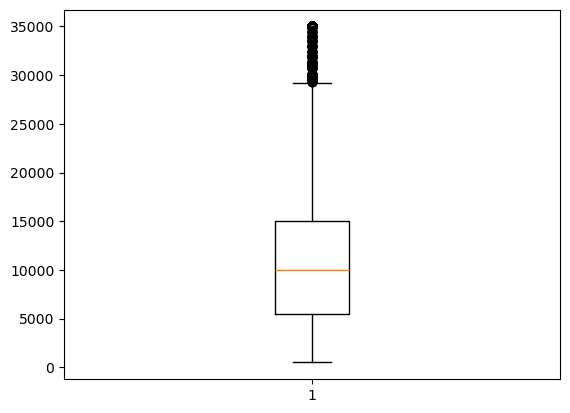

Box plot for column:: funded_amnt_inv


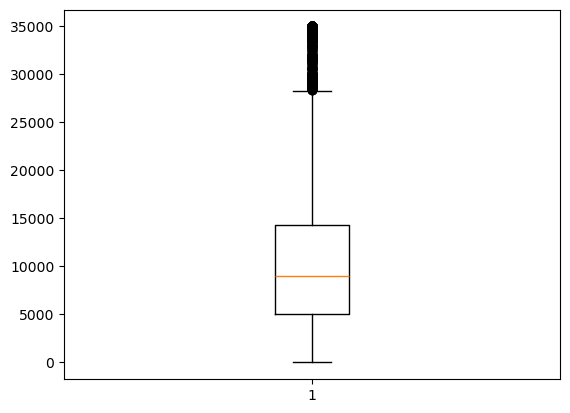

Box plot for column:: annual_inc


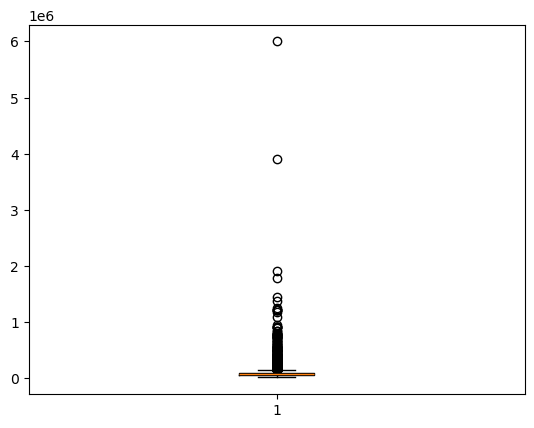

Box plot for column:: int_rate


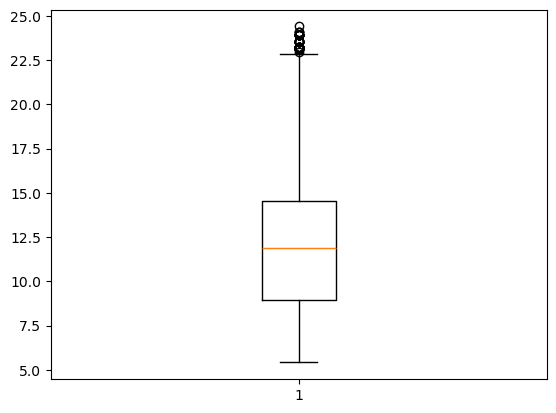

Box plot for column:: dti


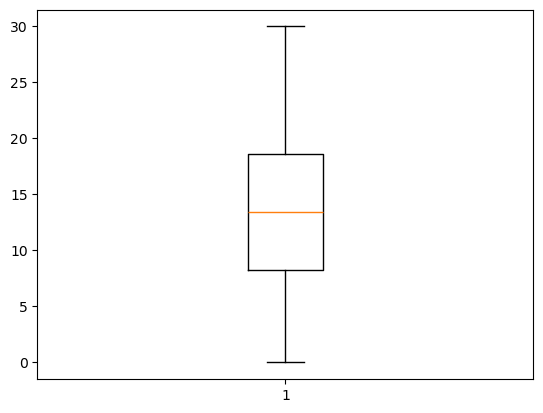

Box plot for column:: installment


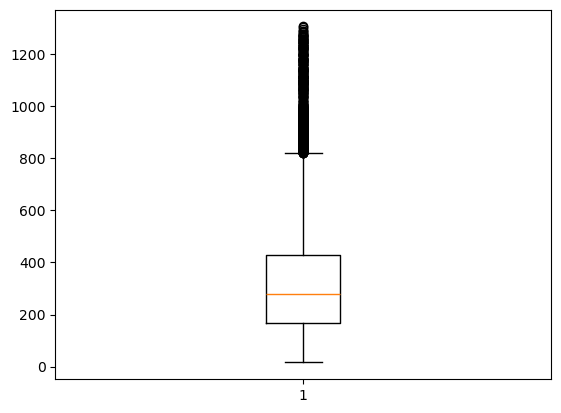

In [741]:
for col in numerical_cols:
    print('Box plot for column::',col)
    plt.boxplot(loan_df[col])
    plt.show()

In [750]:
#Treating outliers present in columns 'loan_amnt','funded_amnt_inv','annual_inc','int_rate','dti','installment'

def outliers_removal_iqr(data, columns, threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-threshold * IQR
        upper_bound = Q3+threshold * IQR
        data=data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
loan_df=outliers_removal_iqr(loan_df, numerical_cols, 1.5)   

Box plot for column:: loan_amnt


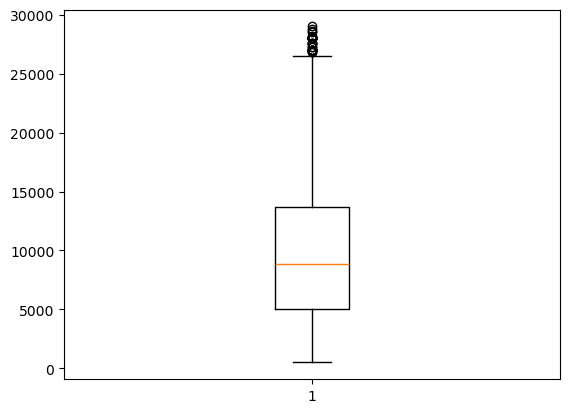

Box plot for column:: funded_amnt_inv


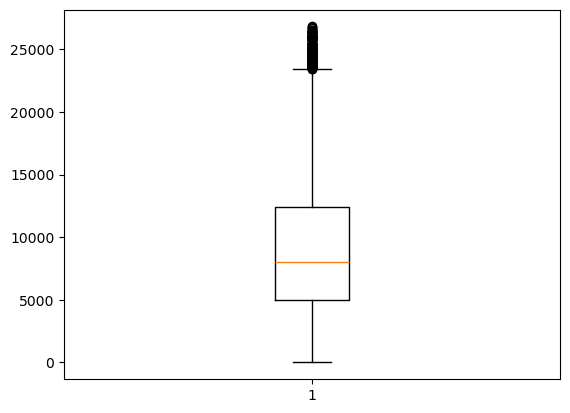

Box plot for column:: annual_inc


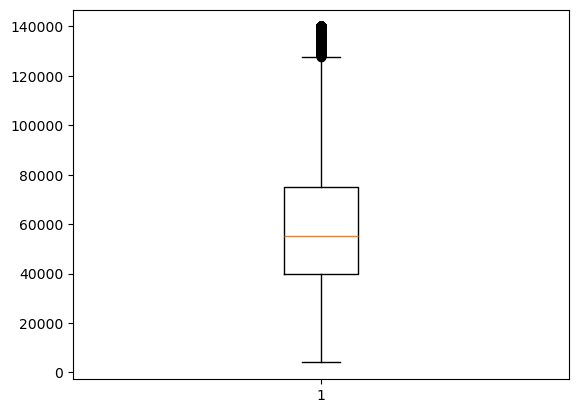

Box plot for column:: int_rate


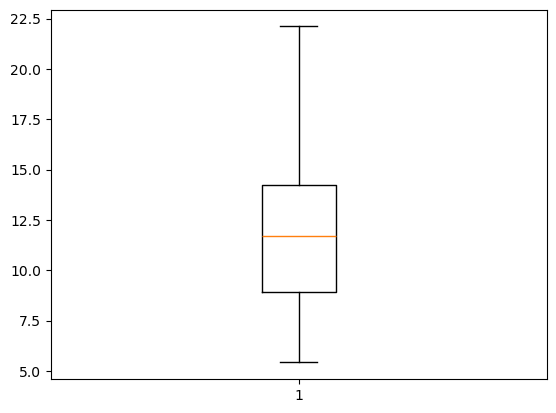

Box plot for column:: dti


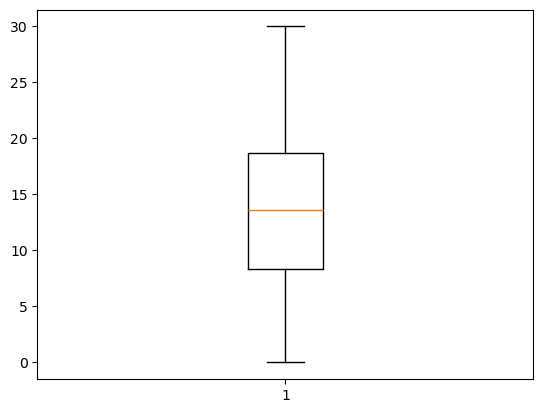

Box plot for column:: installment


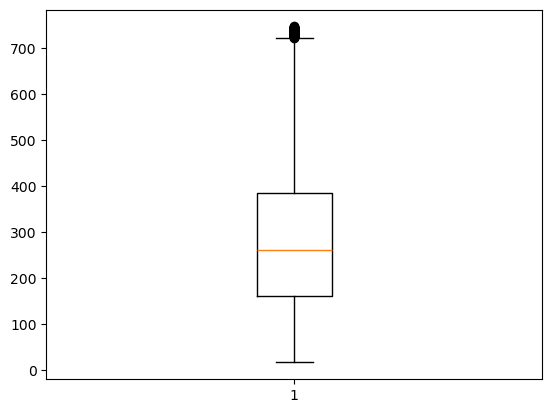

In [752]:
for col in numerical_cols:
    print('Box plot for column::',col)
    plt.boxplot(loan_df[col])
    plt.show()

In [759]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33124 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33124 non-null  int64         
 1   loan_amnt             33124 non-null  int64         
 2   funded_amnt           33124 non-null  int64         
 3   funded_amnt_inv       33124 non-null  float64       
 4   term                  33124 non-null  int64         
 5   int_rate              33124 non-null  float64       
 6   installment           33124 non-null  float64       
 7   grade                 33124 non-null  object        
 8   emp_length            33124 non-null  int64         
 9   home_ownership        33124 non-null  object        
 10  annual_inc            33124 non-null  float64       
 11  verification_status   33124 non-null  object        
 12  issue_d               33124 non-null  datetime64[ns]
 13  loan_status          

In [834]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_month': 'Issue Month',
    'issue_year': 'Issue Year',
    'issue_quarter': 'Issue Quarter',
    'loan_amnt_cat': 'Loan Amount Bins',
    'annual_inc_cat': 'Annual Income Bins',
    'int_rate_cat': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [774]:
# Univariate analysis function 
def plot_diag(data_df,column):
    fig, p=plt.subplots(1,2, figsize=(12,3))
    sns.distplot(data_df.loc[data_df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=data_df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

#### Quantitative Univariate Analysis

<pre>
loan_amnt

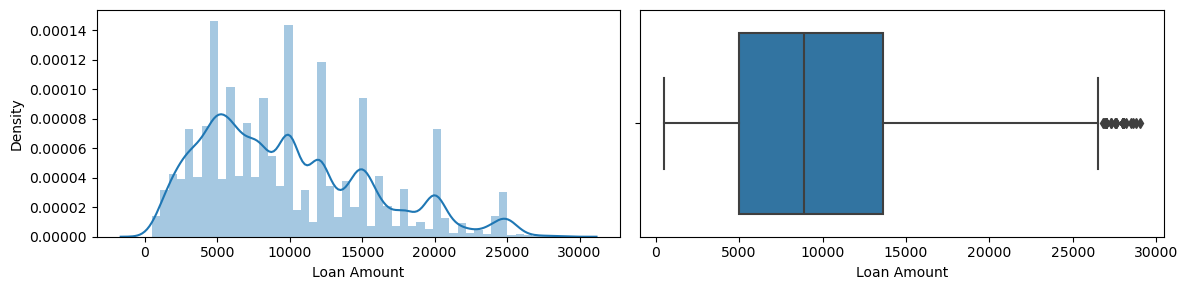

count    33124.000000
mean      9794.340206
std       5785.285678
min        500.000000
25%       5000.000000
50%       8887.500000
75%      13650.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [775]:

plot_diag(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

<pre>
Majority of the loan_amount is in the range of 5K to 14K

<pre>
funded_amnt

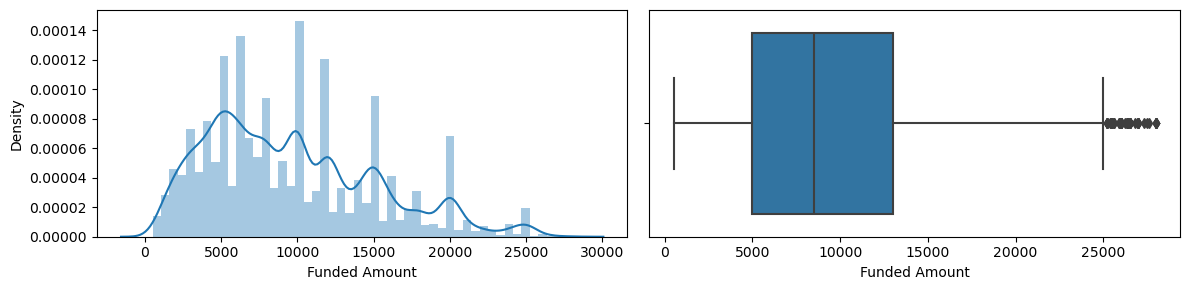

count    33124.000000
mean      9566.868434
std       5538.583891
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [763]:
plot_diag(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

<pre>
Majority of the funded_amount is in the range of 5K to 13K

<pre>
int_rate

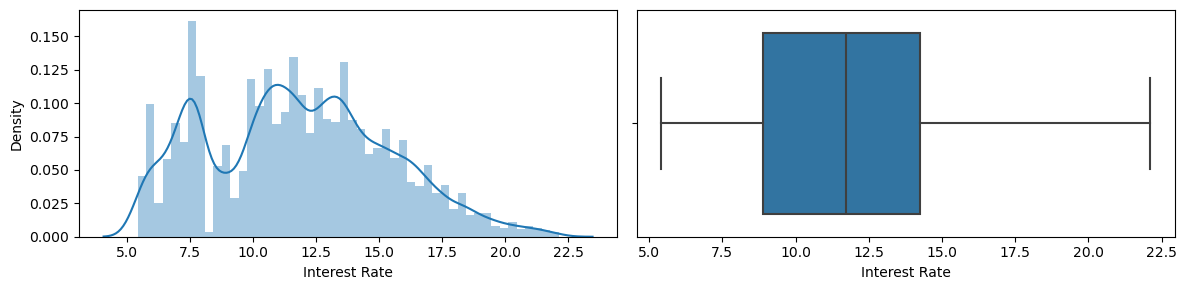

count    33124.000000
mean        11.784271
std          3.591990
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [766]:
plot_diag(loan_df, 'int_rate')
loan_df['int_rate'].describe()

<pre>
Majority of the interest_rate is in the range of 8% to 14%

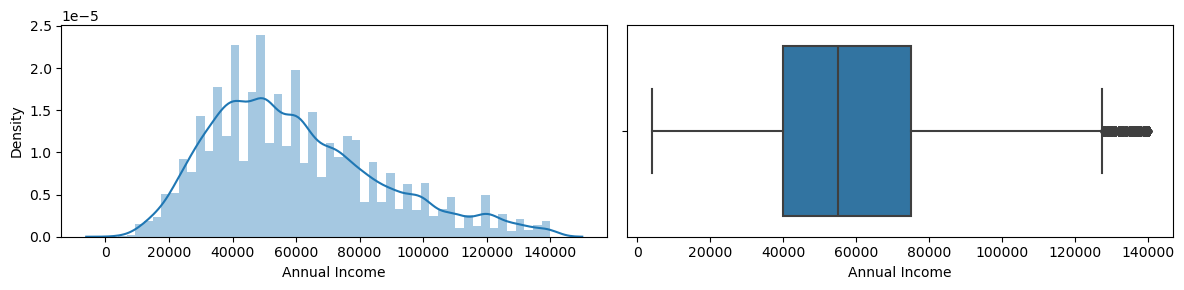

count     33124.000000
mean      59841.029852
std       26905.197824
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [835]:
plot_diag(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

<pre>
The average annual income of Applicants fall between 40K to 75K

#### Unordered Categorical Data

Plotting for column :: home_ownership


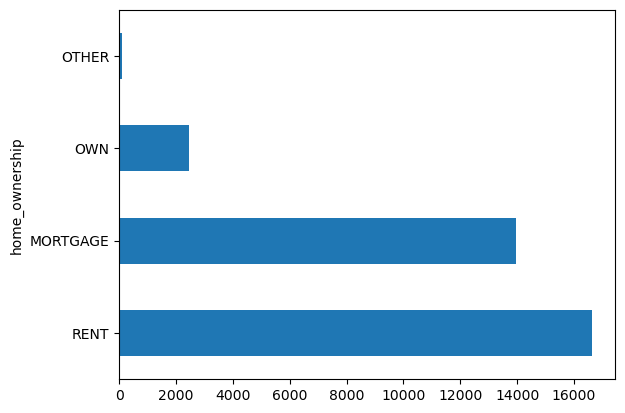

Plotting for column :: purpose


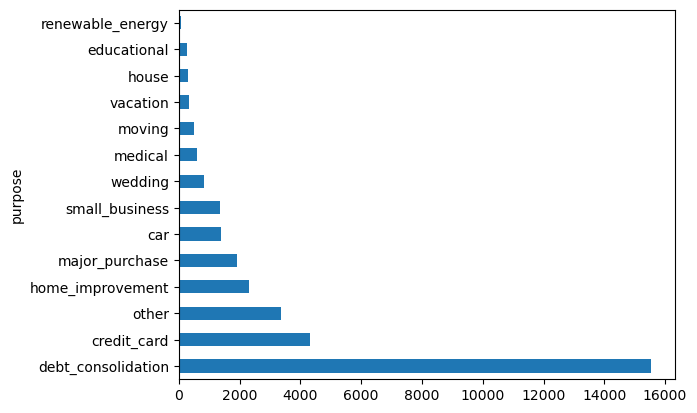

In [817]:
unord_cat_data = ['home_ownership','purpose']
for col in unord_cat_data:
    loan_df[col].value_counts().plot.barh()
    print('Plotting for column ::', col)
    plt.show()

<pre>
This visulization helped us analyse two points:
    1. Majority of the applicants are living on Rent
    2. Applicants for debt_consolidation have a significant number

<Figure size 1200x1200 with 0 Axes>

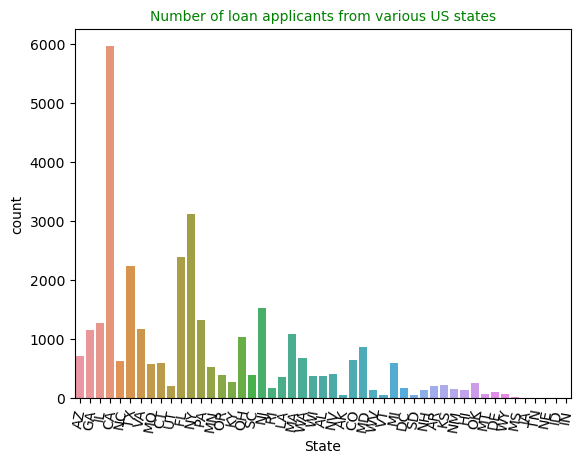

In [844]:
plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
sns.countplot(x='addr_state', data=loan_df)
plt.title('Number of loan applicants from various US states',fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Green'})
plt.xticks(rotation=80)
ax.set_xlabel(column_titles['addr_state'])
plt.show()

<pre>
Maximum number of applicants are from CA state
-----------------------------------------------------------------------------

#### Ordered Categorical Data

In [831]:
ord_cat_data_pie = ['term','pub_rec_bankruptcies','issue_year']

Plotting for column :: term


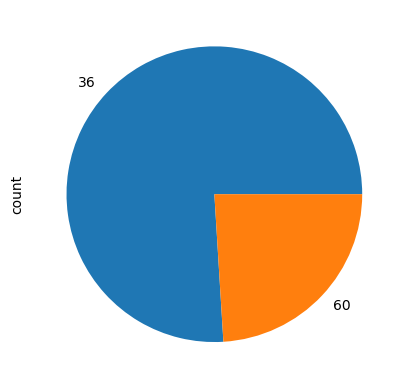

Plotting for column :: pub_rec_bankruptcies


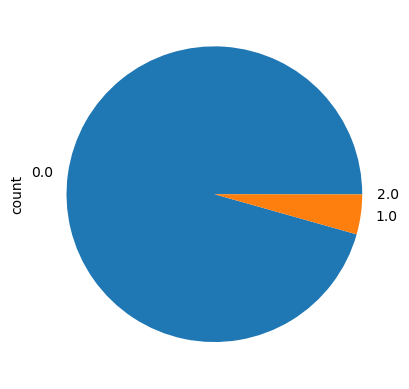

Plotting for column :: issue_year


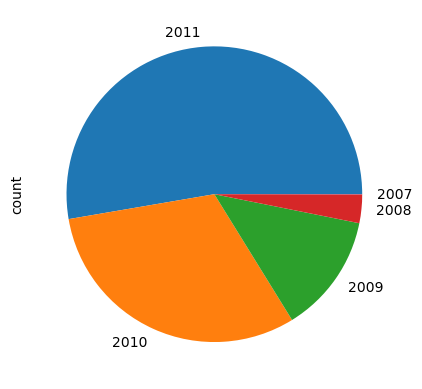

In [832]:
for col in ord_cat_data_pie:
    loan_df[col].value_counts().plot.pie()
    print('Plotting for column ::', col)
    plt.show()

Plotting for column :: grade


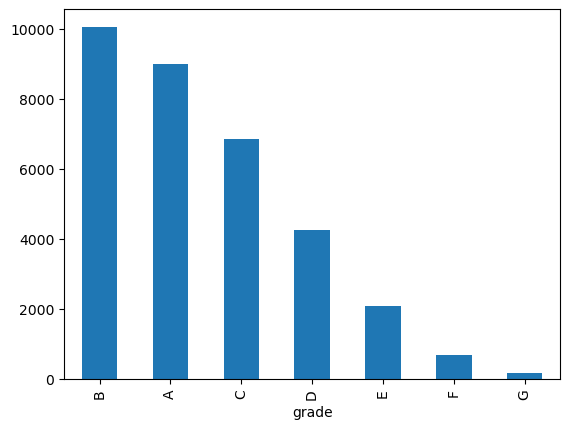

Plotting for column :: emp_length


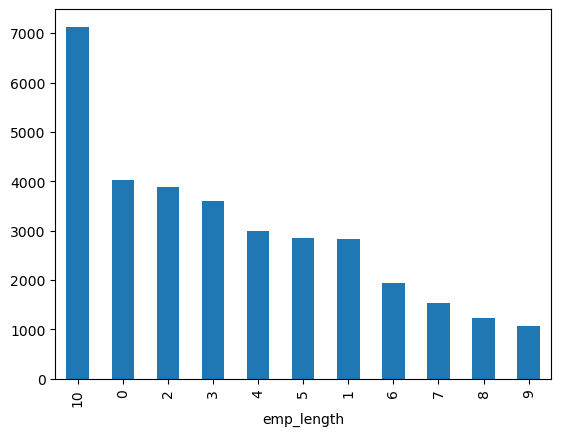

Plotting for column :: issue_month


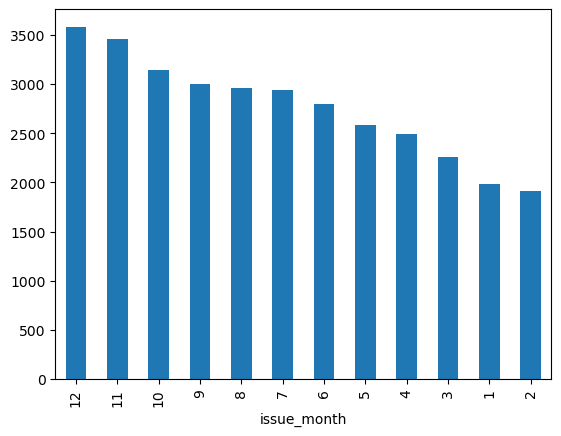

Plotting for column :: issue_quarter


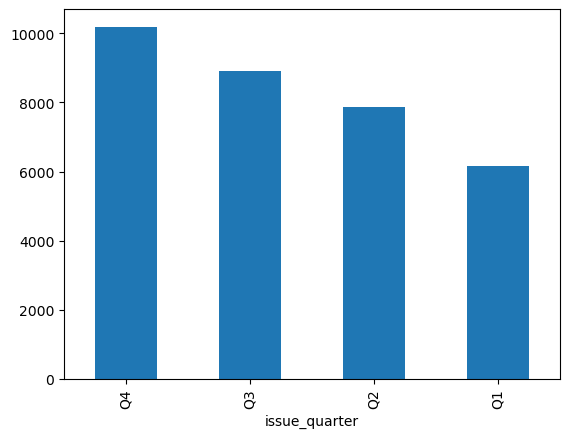

Plotting for column :: loan_amnt_cat


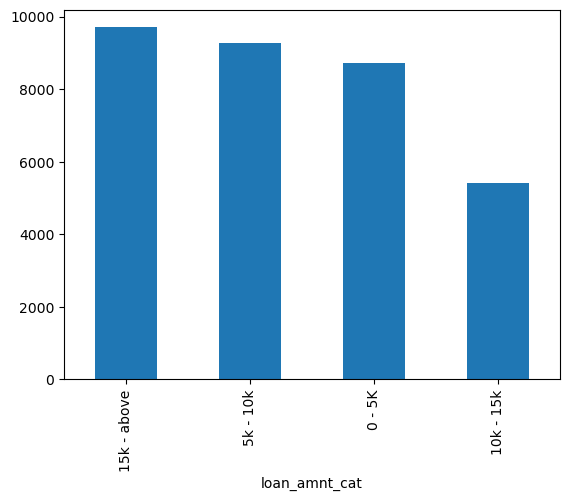

Plotting for column :: int_rate_cat


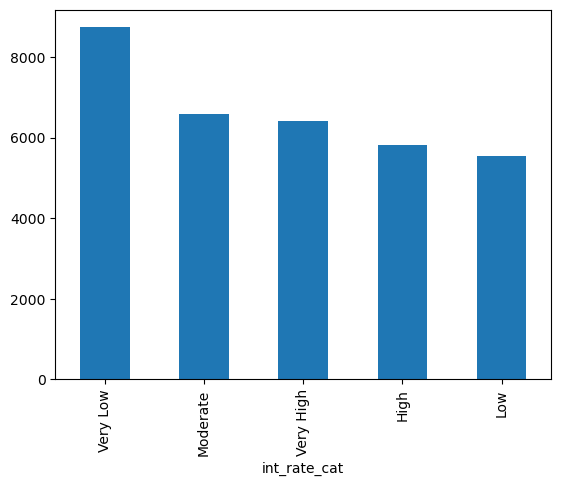

Plotting for column :: annual_inc_cat


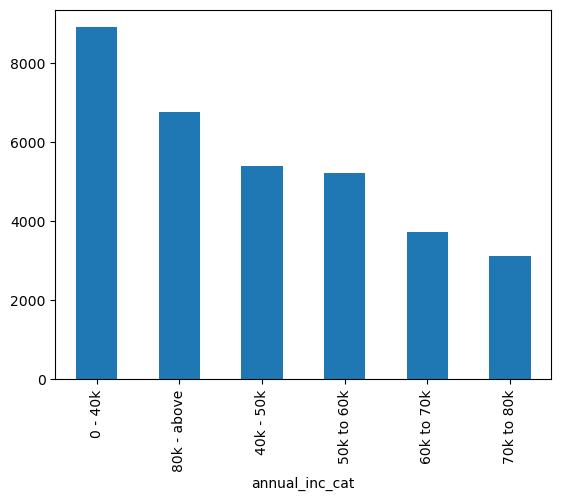

Plotting for column :: dti_cat


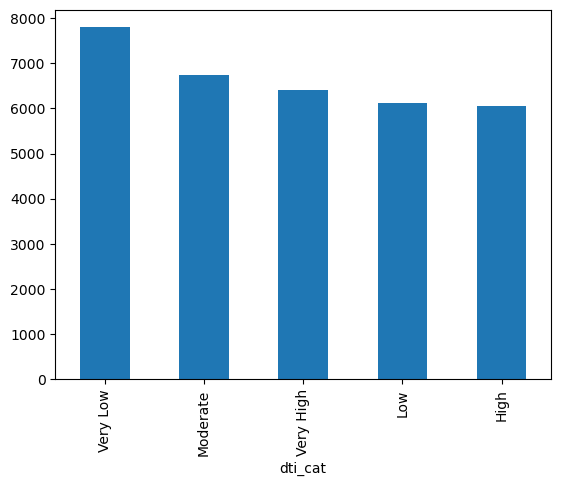

In [838]:
ord_cat_data_bar = ['grade','emp_length','issue_month','issue_quarter','loan_amnt_cat', 'int_rate_cat','annual_inc_cat', 'dti_cat']
for col in ord_cat_data_bar:
    loan_df[col].value_counts().plot.bar()
    print('Plotting for column ::', col)
    plt.show()

<pre>
Time Based Analysis
The loan application count increases every year
The highest number of loan applications are in Quarter 4 of every year.
Lowest number of loan applications are in Q1 might be becaus
    - By year ends people face the financial challen
    - Holiday/Festive sea
    - Possibly because they are consolidating debt by year end

Inferences
The dataset helps understand which segment of customers, the Lending Club needs to target for highest volume of loan.
Highlights that more introspection is needed as why some categories are not as high as other few.
Signifies that the Lending Club has high volume in Q4 and it should target customers in other quarters to increas sales.


#### Bivariate Analysis

<pre>
Analysing below columns:-
    -'term'
    -'emp_length'
    -'annual_inc_cat'
    -'int_rate_cat'
    -'loan_amnt_cat'
    -'home_ownership'
    -'pub_rec_bankruptcies'
    -'issue_quarter' 
    -'State' columns 

    for Bivariate Analysis

In [884]:
#Building a pivot table for above columns vs loan status
bivariate_col_list = ['term','emp_length','annual_inc_cat','int_rate_cat',
                      'loan_amnt_cat','home_ownership','pub_rec_bankruptcies','issue_quarter']
for col in bivariate_col_list:
    print('\n-----Bivariate Analysis of',col,'-----\n')
    print(loan_df.pivot_table(index=col, columns='loan_status', values='id', aggfunc=len))


-----Bivariate Analysis of term -----

loan_status  Charged Off  Fully Paid
term                                
36                  2708       22458
60                  1999        5959

-----Bivariate Analysis of emp_length -----

loan_status  Charged Off  Fully Paid
emp_length                          
0                    566        3464
1                    410        2429
2                    509        3369
3                    492        3116
4                    402        2598
5                    407        2452
6                    272        1663
7                    233        1299
8                    176        1060
9                    141         938
10                  1099        6029

-----Bivariate Analysis of annual_inc_cat -----

loan_status     Charged Off  Fully Paid
annual_inc_cat                         
0 - 40k                1570        7326
40k - 50k               805        4590
50k to 60k              788        4423
60k to 70k              486        

In [978]:
def group_wise(data_df, column):
    group_w = data_df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    group_w['total'] = group_w['Charged Off'] + group_w['Fully Paid']
    group_w['charged_off_ratio'] = round(group_w['Charged Off'] / group_w['total'] * 100)
    group_w.sort_values(by='total', ascending=False)
    return group_w

def group_wise_plot(data_df, column, invert=False):
    plt.figure(figsize=[6,4])
    plt.title('Charged Off : ' + column_titles[column])
    group_w = group_wise(data_df, column)
    if invert:
        sns.barplot(x=group_w['charged_off_ratio'], y=group_w[column])
    else:
        sns.barplot(x=group_w[column], y=group_w['charged_off_ratio'])
    plt.tight_layout()
    plt.show()
    return group_w

##### term

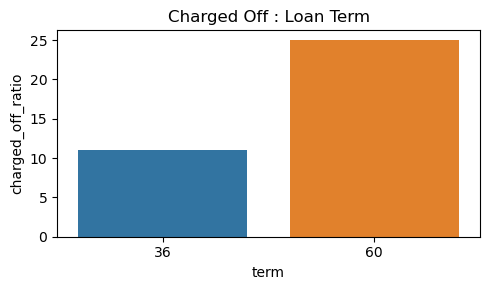

loan_status,term,Charged Off,Fully Paid,total,charged_off_ratio
0,36,2708,22458,25166,11.0
1,60,1999,5959,7958,25.0


In [907]:
group_wise_plot(loan_df, 'term')

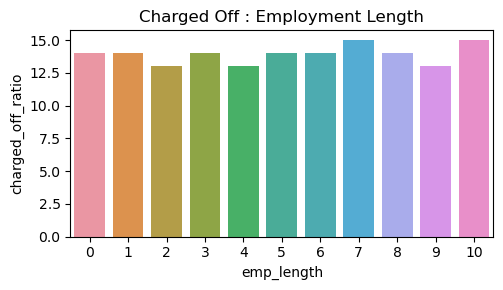

loan_status,emp_length,Charged Off,Fully Paid,total,charged_off_ratio
0,0,566,3464,4030,14.0
1,1,410,2429,2839,14.0
2,2,509,3369,3878,13.0
3,3,492,3116,3608,14.0
4,4,402,2598,3000,13.0
5,5,407,2452,2859,14.0
6,6,272,1663,1935,14.0
7,7,233,1299,1532,15.0
8,8,176,1060,1236,14.0
9,9,141,938,1079,13.0


In [908]:
group_wise_plot(loan_df, 'emp_length')

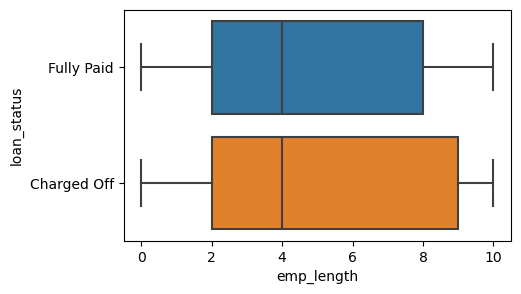

In [911]:
plt.figure(figsize=(5,3))
sns.boxplot(y='loan_status',x='emp_length',data=loan_df)
plt.show()

##### home_ownership

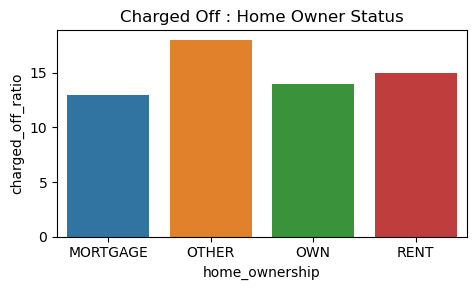

loan_status,home_ownership,Charged Off,Fully Paid,total,charged_off_ratio
0,MORTGAGE,1852,12098,13950,13.0
1,OTHER,16,73,89,18.0
2,OWN,354,2114,2468,14.0
3,RENT,2485,14132,16617,15.0


In [912]:
group_wise_plot(loan_df, 'home_ownership')

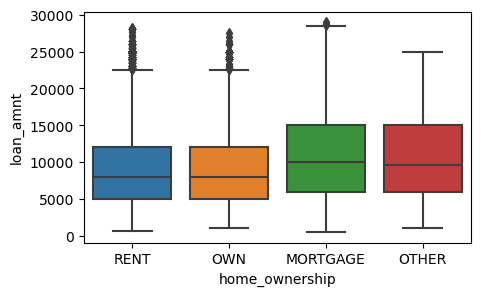

In [919]:
plt.figure(figsize=(5,3))
sns.boxplot(y='loan_amnt',x='home_ownership',data=loan_df)
plt.show()

##### pub_rec_bankruptcies

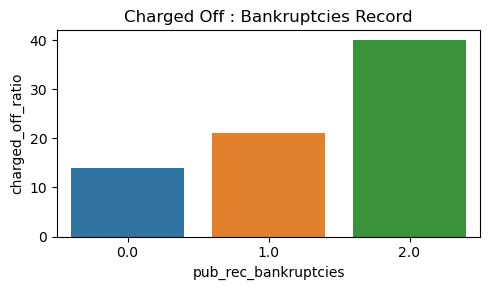

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charged_off_ratio
0,0.0,4397,27277,31674,14.0
1,1.0,308,1137,1445,21.0
2,2.0,2,3,5,40.0


In [915]:
group_wise_plot(loan_df, 'pub_rec_bankruptcies')

##### issue_quarter

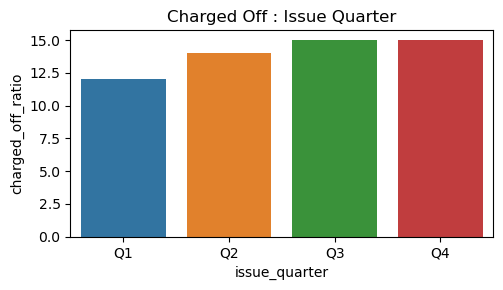

loan_status,issue_quarter,Charged Off,Fully Paid,total,charged_off_ratio
0,Q1,766,5390,6156,12.0
1,Q2,1127,6745,7872,14.0
2,Q3,1296,7611,8907,15.0
3,Q4,1518,8671,10189,15.0


In [917]:
group_wise_plot(loan_df, 'issue_quarter')

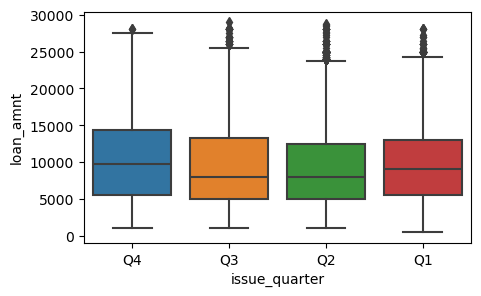

In [920]:
plt.figure(figsize=(5,3))
sns.boxplot(y='loan_amnt',x='issue_quarter',data=loan_df)
plt.show()

##### annual_inc_cat

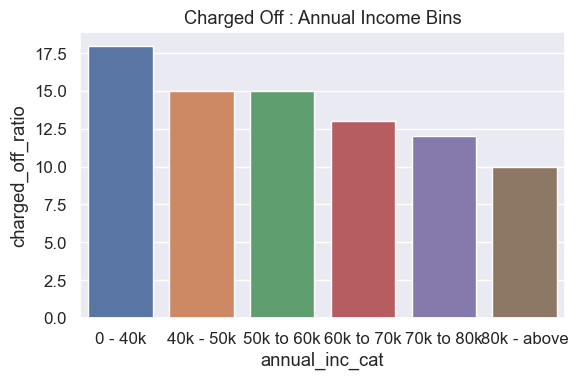

loan_status,annual_inc_cat,Charged Off,Fully Paid,total,charged_off_ratio
0,0 - 40k,1570,7326,8896,18.0
1,40k - 50k,805,4590,5395,15.0
2,50k to 60k,788,4423,5211,15.0
3,60k to 70k,486,3250,3736,13.0
4,70k to 80k,385,2740,3125,12.0
5,80k - above,673,6088,6761,10.0


In [979]:
group_wise_plot(loan_df, 'annual_inc_cat')

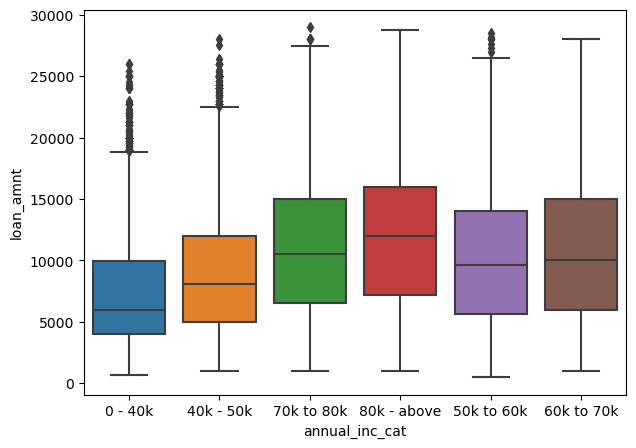

In [926]:
plt.figure(figsize=(7,5))
sns.boxplot(x='annual_inc_cat',y='loan_amnt',data=loan_df)
plt.show()

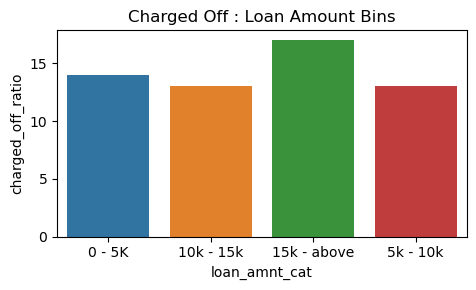

loan_status,loan_amnt_cat,Charged Off,Fully Paid,total,charged_off_ratio
0,0 - 5K,1180,7533,8713,14.0
1,10k - 15k,729,4695,5424,13.0
2,15k - above,1615,8092,9707,17.0
3,5k - 10k,1183,8097,9280,13.0


In [928]:
group_wise_plot(loan_df, 'loan_amnt_cat')

##### int_rate_cat

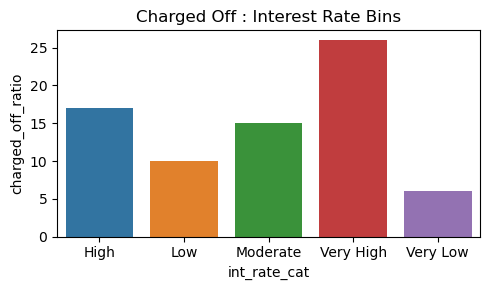

loan_status,int_rate_cat,Charged Off,Fully Paid,total,charged_off_ratio
0,High,985,4841,5826,17.0
1,Low,579,4982,5561,10.0
2,Moderate,959,5626,6585,15.0
3,Very High,1667,4744,6411,26.0
4,Very Low,517,8224,8741,6.0


In [930]:
group_wise_plot(loan_df, 'int_rate_cat')

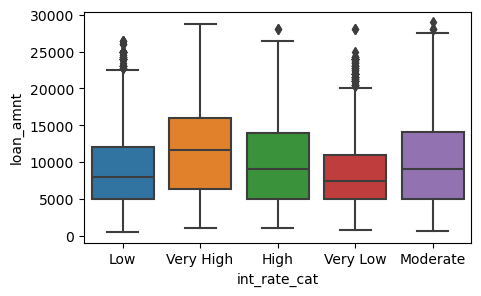

In [932]:
plt.figure(figsize=(5,3))
sns.boxplot(x='int_rate_cat',y='loan_amnt',data=loan_df)
plt.show()

##### addr_state

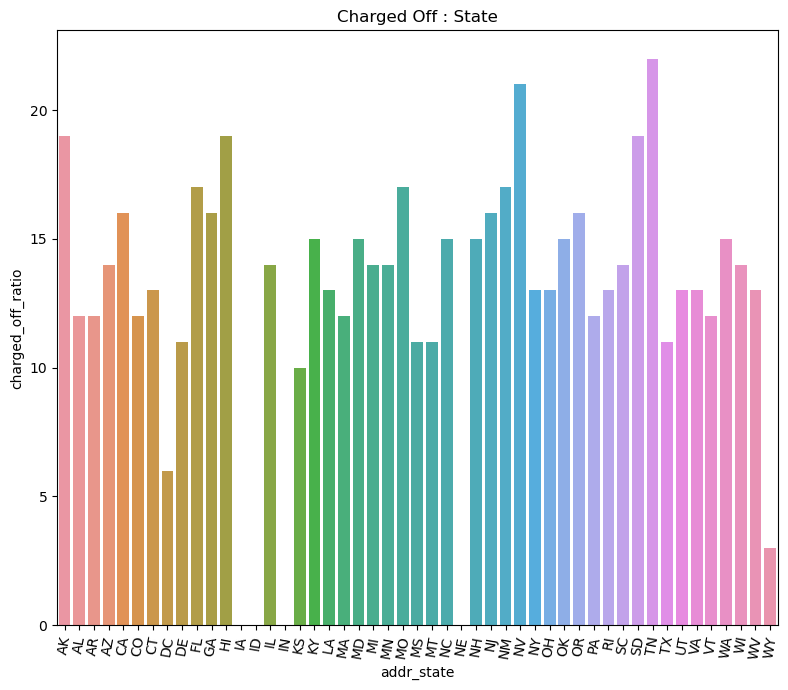

In [942]:
plt.figure(figsize=[8,7])
plt.title('Charged Off : ' + column_titles['addr_state'])
group_w = group_wise(loan_df, 'addr_state')
sns.barplot(x=group_w['addr_state'], y=group_w['charged_off_ratio'])
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [943]:
group_w

loan_status,addr_state,Charged Off,Fully Paid,total,charged_off_ratio
0,AK,12.0,51.0,63.0,19.0
1,AL,45.0,329.0,374.0,12.0
2,AR,25.0,183.0,208.0,12.0
3,AZ,102.0,621.0,723.0,14.0
4,CA,932.0,5023.0,5955.0,16.0
5,CO,77.0,575.0,652.0,12.0
6,CT,80.0,527.0,607.0,13.0
7,DC,10.0,163.0,173.0,6.0
8,DE,11.0,90.0,101.0,11.0
9,FL,413.0,1987.0,2400.0,17.0


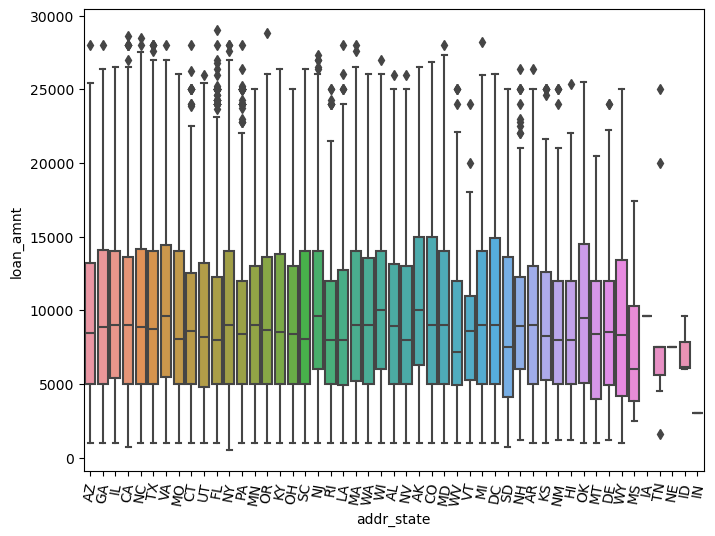

In [947]:
plt.figure(figsize=(8,6))
sns.boxplot(x='addr_state',y='loan_amnt',data=loan_df)
plt.xticks(rotation=80)
plt.show()

<pre>
-------------------------------------------------------------------------------------

#### Multivariate/Correlation Analysis

In [959]:
loan_df.shape

(33124, 26)

In [960]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33124 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33124 non-null  int64         
 1   loan_amnt             33124 non-null  int64         
 2   funded_amnt           33124 non-null  int64         
 3   funded_amnt_inv       33124 non-null  float64       
 4   term                  33124 non-null  int64         
 5   int_rate              33124 non-null  float64       
 6   installment           33124 non-null  float64       
 7   grade                 33124 non-null  object        
 8   emp_length            33124 non-null  int64         
 9   home_ownership        33124 non-null  object        
 10  annual_inc            33124 non-null  float64       
 11  verification_status   33124 non-null  object        
 12  issue_d               33124 non-null  datetime64[ns]
 13  loan_status          

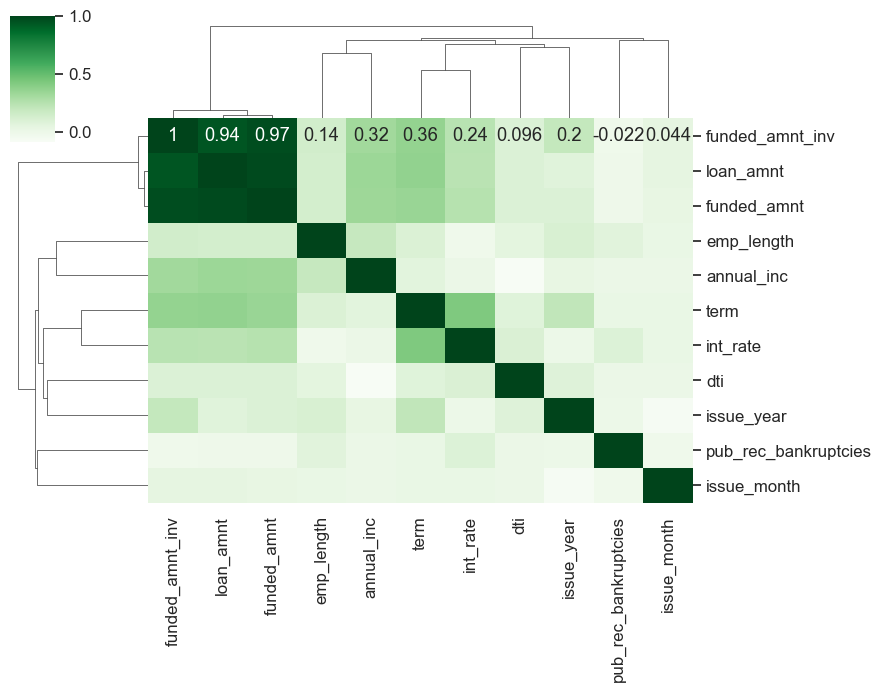

In [970]:
corr_df=loan_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                'emp_length','annual_inc','dti', 'pub_rec_bankruptcies','issue_year','issue_month'           
                ]]
correltn = corr_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(correltn, annot=True, figsize=(9,7), cmap="Greens")
plt.show()

In [963]:
#Removing redundant columns to understand the correlation better

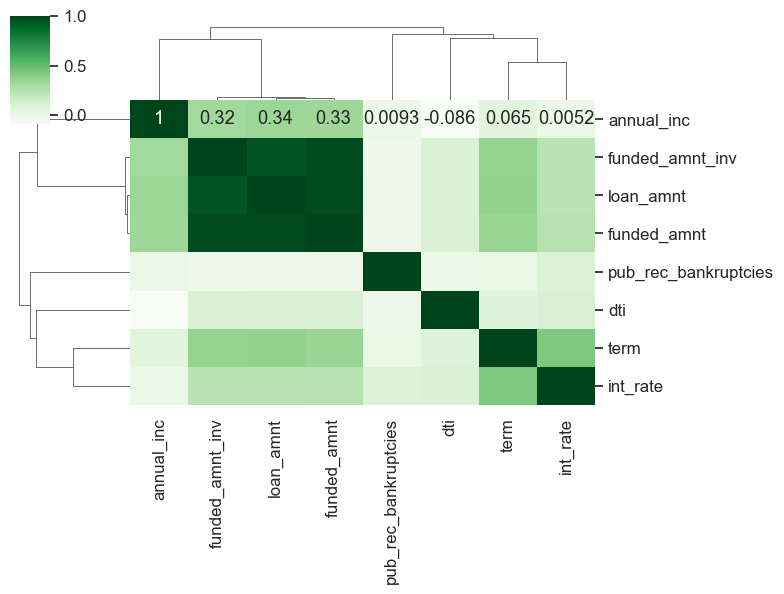

In [969]:
correltn = corr_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                    'annual_inc','dti', 'pub_rec_bankruptcies']].corr()
sns.set(font_scale=1.1)
sns.clustermap(correltn, annot=True, figsize=(8,6), cmap="Greens")
plt.show()

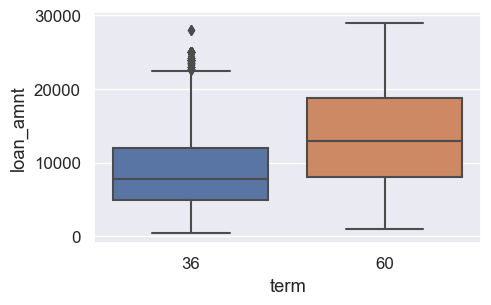

In [977]:
#Validation the strong correlation of term and loan_amnt
plt.figure(figsize=(5,3))
sns.boxplot(x = 'term', y = 'loan_amnt', data=loan_df)
plt.show()

<Figure size 600x1000 with 0 Axes>

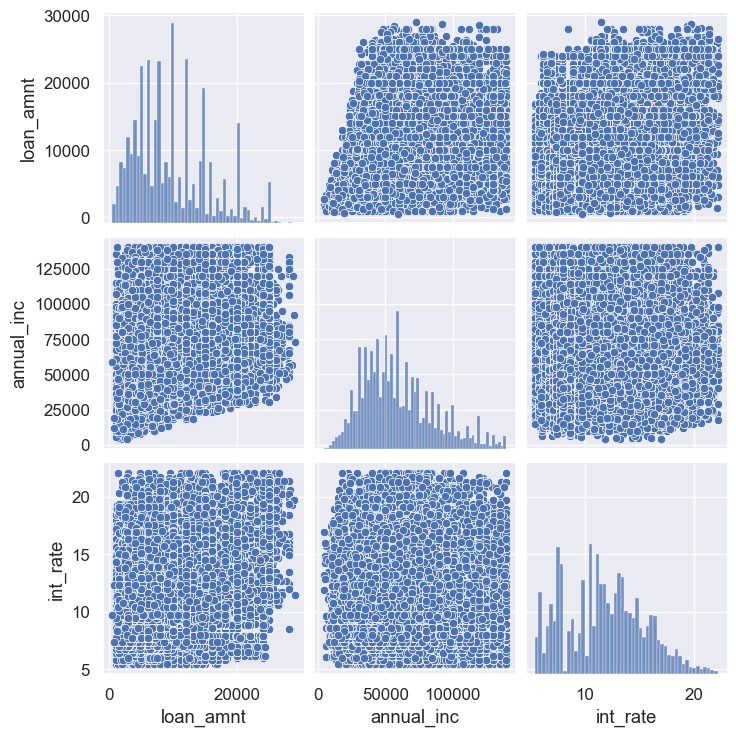

In [968]:
plt.figure(figsize=(6,10))
sns.pairplot(loan_df[['loan_amnt', 'annual_inc', 'int_rate']])
plt.show()

<pre>
.Explored interactions between multiple variables.
Negative Correlation
.loan_amnt has negative correlation with pub_rec_bankrupticies
.annual income has a negative correlation with dti field
Strong Correlation
.term has a strong correlation with loan amount
.term has a strong correlation with interest rate
.annual income has a strong correlation with loan_amount
Weak Correlation
.debt-to-income ratio and annual income show correlations with loan status.
.pub_rec_bankruptcies has weak correlation with majority of the attributes